In [1]:
import yaml,os
import sys
import shutil
import librosa
import soundfile as sf, numpy as np, pandas as pd
import argparse, textwrap
import wave, numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy import fftpack
from scipy import signal
from scipy.io import wavfile
from sound_detection_utils19 import *


 {'bg_path': 'audio/a019_0_30.wav', 'event_path': 'gunshot/166191.wav', 'event_length_seconds': 2.08, 'event_present': True, 'ebr': -6.0, 'bg_classname': 'park', 'segment_end_seconds': 2.08, 'segment_start_seconds': 0.0, 'event_class': 'gunshot', 'scaling_factor': 0.017394337726983598, 'mixture_audio_filename': 'mixture_devtrain_gunshot_002_590314a2effaf3df7b5805de44f34b05.wav', 'event_start_in_mixture_seconds': 3.4961580217099333, 'annotation_string': 'mixture_devtrain_gunshot_002_590314a2effaf3df7b5805de44f34b05.wav\t3.4961580217099333\t5.576158021709933\tgunshot'} 



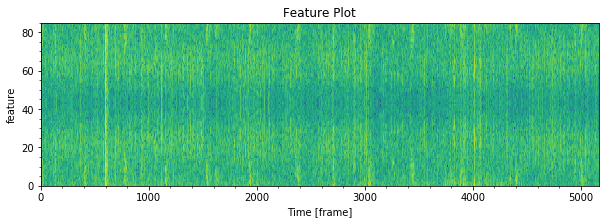

In [2]:
train_yaml_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\meta"
train_yaml_file = "mixture_recipes_devtrain_gunshot.yaml"
train_audio_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\audio"

train_data = read_meta_yaml(train_yaml_path +"\\" + train_yaml_file)
nn = 2
len_frame = 512
x_wave,fs = sf.read(train_audio_path+"\\"+train_data[nn]['mixture_audio_filename'])

x = x_wave.astype(float)

if(x.shape==(x.shape[0],)):
    f, t, Sxx = signal.spectrogram(x, fs,window=("hann"),nperseg=len_frame, noverlap=len_frame/2, return_onesided=False)
else:
    f, t, Sxx = signal.spectrogram(x[:,0], fs,window=("hann"),nperseg=len_frame, noverlap=len_frame/2,return_onesided=False)
    
Sxx_low = Sxx[int(Sxx.shape[0]/6):int(Sxx.shape[0]/4)]
Sxx_hi = Sxx[int(Sxx.shape[0]*3/4):int(Sxx.shape[0]*5/6)]
Sxx_spec = np.vstack((Sxx_low,Sxx_hi))
Sxx_spec = Sxx_spec.T
#Sxx_spec = Sxx.T

print("\n",train_data[nn],"\n")

Sxx_spec = np.sqrt(Sxx_spec)
plt.rcParams["figure.figsize"] = [10,3]
plt.pcolormesh(np.log(Sxx_spec.T))
plt.title("Feature Plot")
plt.ylabel('feature')
plt.xlabel('Time [frame]')
plt.minorticks_on()
plt.show()  

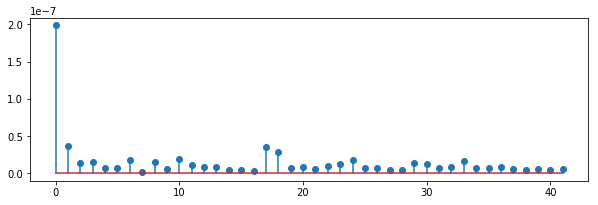

In [3]:
Sxx_spec_idft = np.zeros_like(Sxx_spec)
N = int(Sxx_spec_idft.shape[1]/2)
LCR = np.zeros((Sxx_spec.shape[0],4))
for i in range(Sxx_spec.shape[0]):
    Sxx_spec_idft[i] = np.abs(fftpack.ifft(Sxx_spec[i]))
    denom = np.sum(Sxx_spec_idft[i][0:N]**2)
    for L in range(4):
        LCR[i][L] = np.sum(Sxx_spec_idft[i][0:L]**2)/denom
plt.stem(Sxx_spec_idft[650][:N])
plt.show()  



(5166, 4)


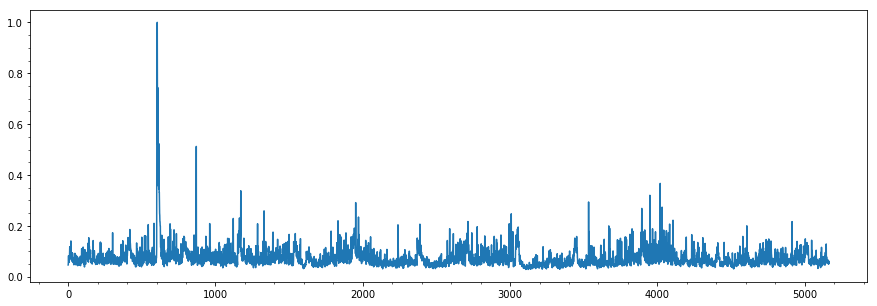

In [4]:
print(LCR.shape)
diff = np.zeros(LCR.shape[0])
zero_freq = np.zeros(LCR.shape[0])
for i in range(diff.shape[0]):
        diff[i] = np.abs(LCR[i][1]-LCR[i][2])/(LCR[i][1])
        zero_freq[i] = Sxx_spec_idft[i][0]
plt.rcParams["figure.figsize"] = [15,5]  
#plt.plot(diff[:])
zero_freq = zero_freq/zero_freq.max()
plt.plot(zero_freq)
plt.minorticks_on()
plt.show()  

In [20]:
def zero_idft_energy(Sxx_spec):
    Sxx_in = Sxx_spec.T
    Sxx_low = Sxx_in[int(Sxx.shape[0]/8):int(Sxx.shape[0]/4)]
    Sxx_hi = Sxx_in[int(Sxx.shape[0]*3/4):int(Sxx.shape[0]*7/8)]
    print(Sxx_in.shape,Sxx_low.shape,Sxx_hi.shape)
    Sxx_in = np.vstack((Sxx_low,Sxx_hi))
    Sxx_in = Sxx_in.T
    
    Sxx_spec_idft = np.zeros_like(Sxx_in)
    zero_freq = np.zeros(Sxx_spec_idft.shape[0])
    for i in range(Sxx_in.shape[0]):   
        #tmp = Sxx_in[i][:]
        #tmp /= tmp.max()
        #lo = np.sum(tmp[1:20])
        #mid= np.sum(tmp[int(Sxx_in.shape[1]/2)-10:int(Sxx_in.shape[1]/2)+10])
        #zero_freq[i] = np.sum(Sxx_in[i][:])/np.abs(lo-mid)
        zero_freq[i] = np.sum(Sxx_in[i][:])
        
    zero_freq = zero_freq/zero_freq.max()
    
    
    return zero_freq

Sxx.shape= (257, 5166)
(257, 5166) (64, 5166) (0, 5166)


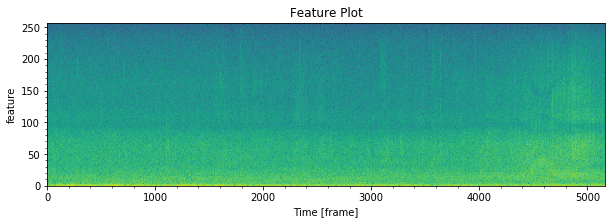

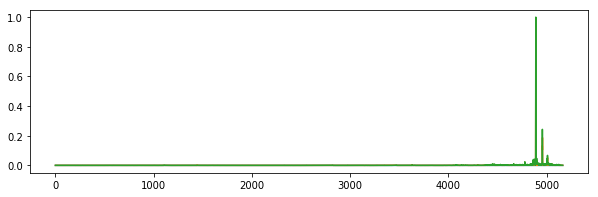

Sxx.shape= (257, 5166)
(257, 5166) (64, 5166) (0, 5166)


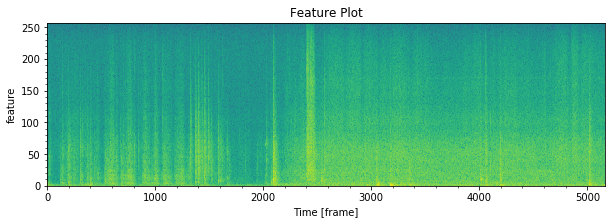

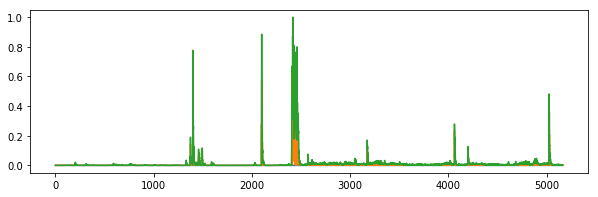

Sxx.shape= (257, 5166)
t_begin= 603 t_end= 960
(257, 5166) (64, 5166) (0, 5166)


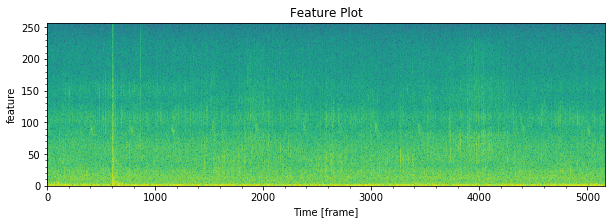

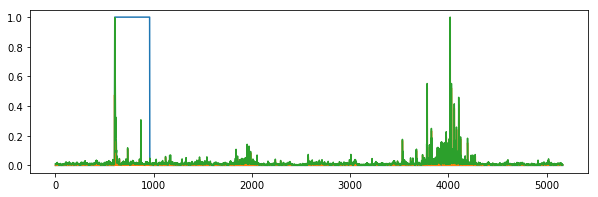

Sxx.shape= (257, 5166)
t_begin= 847 t_end= 1073
(257, 5166) (64, 5166) (0, 5166)


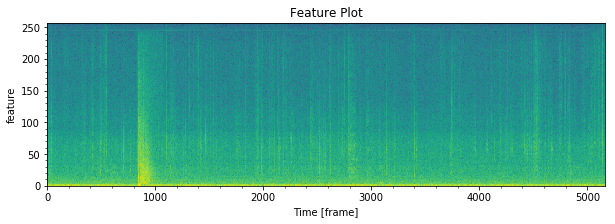

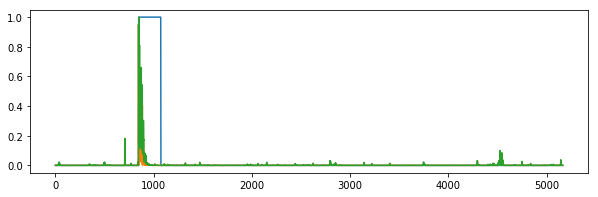

Sxx.shape= (257, 5166)
t_begin= 2775 t_end= 2870
(257, 5166) (64, 5166) (0, 5166)


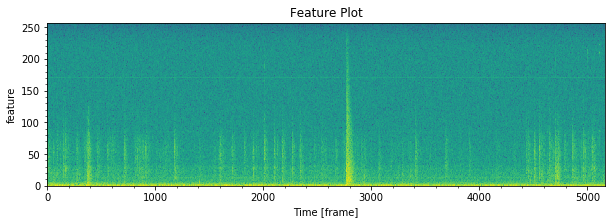

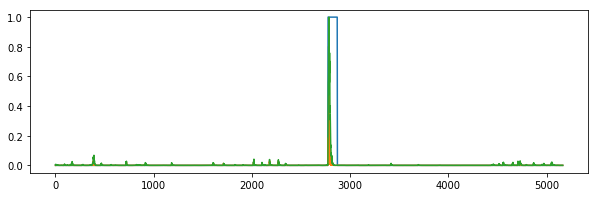

Sxx.shape= (257, 5166)
t_begin= 1891 t_end= 2021
(257, 5166) (64, 5166) (0, 5166)


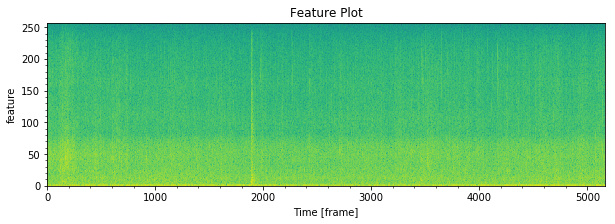

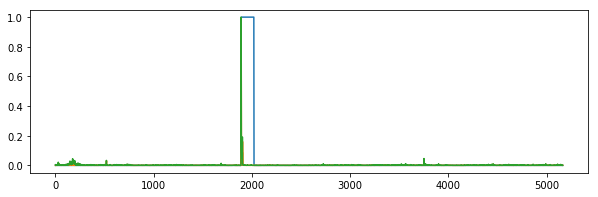

Sxx.shape= (257, 5166)
(257, 5166) (64, 5166) (0, 5166)


KeyboardInterrupt: 

In [21]:
train_yaml_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\meta"
train_yaml_file = "mixture_recipes_devtrain_gunshot.yaml"
train_audio_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\audio"

train_data = read_meta_yaml(train_yaml_path +"\\" + train_yaml_file)
len_frame = 512
for nn in range(len(train_data)):
    Sxx_spec,labels,fs = prep_from_yaml(train_data[nn],train_audio_path,listen=0,noise=0,trunc=False,nperseg=len_frame, noverlap=int(len_frame/2))  
    zf = zero_idft_energy(Sxx_spec)
    zfd= np.zeros_like(zf)
    zfd[1:] = np.abs(zf[1:]-zf[:zf.shape[0]-1])
    
    plt.rcParams["figure.figsize"] = [10,3]
    plt.pcolormesh(np.log(Sxx_spec.T))
    plt.title("Feature Plot")
    plt.ylabel('feature')
    plt.xlabel('Time [frame]')
    plt.minorticks_on()
    plt.show()  
    plt.plot(labels)
    plt.plot(zfd)
    plt.plot(zf)
    plt.show()

Sxx.shape= (513, 2582)


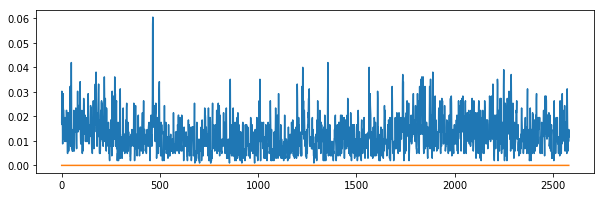

In [44]:
test_yaml_path = "audio_set\\DCASE\\devtest\\20b255387a2d0cddc0a3dff5014875e7\\meta"
test_audio_path = "audio_set\\DCASE\\devtest\\20b255387a2d0cddc0a3dff5014875e7\\audio"    
test_yaml_file=("mixture_recipes_devtest_gunshot.yaml")

m = 103
test_data  = read_meta_yaml( test_yaml_path +"\\" +  test_yaml_file)
Sxx_spec,labels,fs = prep_from_yaml(test_data[m],test_audio_path,\
                                            listen=0,noise=0,trunc=False,nperseg=1024, noverlap=512)    
zcr = zero_crossing_rate(test_data[m],test_audio_path,trunc=False,nperseg=1024, noverlap=512)


plt.plot(zcr)
plt.plot(labels)
plt.show()